# XiheNet Model Training Plotting

The following code is used for generating Figure 14 (a)

Training logs are included in `logs/training_logs.csv`

In [1]:
import os
os.chdir(f'{os.getcwd()}/../../')
WORKING_DIR = './evaluation/training'

In [2]:
import re
import yaml
import numpy as np
import pandas as pd
from glob import glob
from ipywidgets import interactive

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True)

In [3]:
report = pd.read_csv(f'{WORKING_DIR}/logs/training_logs.csv')

<ipython-input-4-9856be83b7e4>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2), size=14)


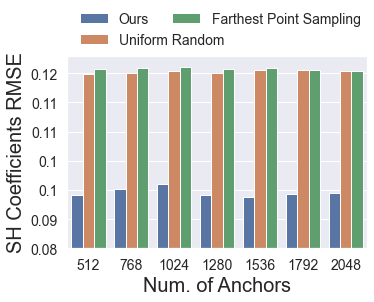

In [4]:
plt.figure(figsize=(5, 4))

p = report.groupby(['n_points', 'dataset']).head(5)
p = p.groupby(['n_points', 'dataset']).mean().reset_index()
p[['n_points']] = p[['n_points']].astype(str)

plt.ylim([0.085, 0.118])
ax = sns.barplot(
    data=p, x='n_points', y='test_shc_rmse', hue='dataset',
    hue_order=['xihe', 'pointar', 'xihe_fps']
)

ax.set_xlabel('Num. of Anchors', fontsize=20)
ax.set_ylabel('SH Coefficients RMSE', fontsize=20)
l = ax.legend(
    loc='lower center', fontsize=14, ncol=2,
    bbox_to_anchor=(0, 0.98, 1.02, 1.02), mode='expand',
    edgecolor=(0, 0, 0, 0),
    facecolor=(0, 0, 1, 0.0)
)
l.get_frame().set_alpha(None)
l.get_texts()[0].set_text('Ours')
l.get_texts()[1].set_text('Uniform Random')
l.get_texts()[2].set_text('Farthest Point Sampling')

plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
ax.set_xticklabels(ax.get_xticklabels(), size=14)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2), size=14)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/xihenet_shc_rmse.pdf')